## House Price Prediction using Regression

### Problem Statement: Please do EDA and predict the sale price of Houses based on given factors whichever possible.

### File descriptions
    ● train.csv - the training set.
    ● data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.

### Importing Libraries

In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

### Loading and Checking the Dataset

In [2]:
df_train_main = pd.read_csv("train.csv")
df_train_main.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
735,736,75,RM,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,7,1914,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Rec,390,Unf,0,490,880,GasW,Fa,N,SBrkr,880,888,0,1768,0,0,1,1,2,1,TA,6,Typ,2,TA,Detchd,1914.0,Unf,2,320,TA,TA,N,0,341,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,163000
232,233,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1972,1972,Gable,CompShg,HdBoard,HdBoard,BrkFace,297.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,483,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,1,Po,Attchd,1972.0,Unf,1,288,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,94500
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
545,546,50,RL,NaN,13837,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1.5Fin,7,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,BrkFace,178.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,1002,LwQ,202,0,1204,GasA,Gd,Y,SBrkr,1377,806,0,2183,0,0,2,1,4,1,Gd,9,Typ,0,NaN,Attchd,1988.0,Unf,3,786,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,229000
625,626,20,RL,87.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1962,1962,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,261.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1116,1116,GasA,TA,Y,SBrkr,1116,0,0,1116,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1962.0,Unf,2,440,TA,TA,Y,0,0,0,0,385,0,NaN,NaN,NaN,0,2,2010,WD,Normal,160000


In [3]:
df_test_main = pd.read_csv("test.csv")
df_test_main.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1158,2619,20,RL,90.0,11727,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1969,1969,Gable,CompShg,HdBoard,HdBoard,BrkFace,434.0,TA,Gd,CBlock,TA,TA,Mn,Unf,0.0,Unf,0.0,1851.0,1851.0,GasA,Gd,Y,SBrkr,1851,0,0,1851,0.0,0.0,2,0,3,1,TA,8,Typ,1,TA,Attchd,1969.0,Fin,2.0,506.0,TA,TA,Y,0,146,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
355,1816,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,8,1923,1950,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,TA,PConc,Fa,TA,No,Unf,0.0,Unf,0.0,624.0,624.0,GasA,TA,Y,SBrkr,792,0,0,792,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1963.0,Unf,1.0,287.0,TA,TA,Y,0,0,81,0,0,0,NaN,GdWo,NaN,0,2,2009,WD,Normal
497,1958,60,RL,NaN,14311,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,402.0,Gd,TA,PConc,Gd,TA,No,GLQ,1023.0,Unf,0.0,213.0,1236.0,GasA,Ex,Y,SBrkr,1236,1104,0,2340,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1996.0,RFn,3.0,787.0,TA,TA,Y,192,180,218,0,0,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal
575,2036,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,466.0,Gd,TA,PConc,Gd,TA,No,GLQ,612.0,Unf,0.0,348.0,960.0,GasA,Ex,Y,SBrkr,962,624,0,1586,1.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Detchd,1999.0,Unf,2.0,480.0,TA,TA,Y,169,0,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
123,1584,60,RL,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1040.0,1040.0,GasA,Ex,Y,SBrkr,1044,1054,0,2098,0.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1997.0,Fin,2.0,621.0,TA,TA,Y,331,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


### Concatenation

In [4]:
df_train = pd.concat([df_train_main, df_test_main])
df_train = df_train.drop(["Id"], axis = 1)

### Shape of the Dataset

In [5]:
df_train.shape

(2919, 80)

### Checking the Columns/Features

In [6]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Information about the Dataset

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

#### As we can see there are 35 integer features, 3 float features and 43 object/string features. So, lets check how many Numerical and Categorical features are present in this Dataset

In [8]:
numerical_features = df_train.select_dtypes(include = ['int', 'float']).columns.tolist()
print("Number of Numerical features:", len(numerical_features))
print(numerical_features)

Number of Numerical features: 37
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [9]:
categorical_features = df_train.select_dtypes(include = ['object']).columns.tolist()
print("Number of Categorical features:", len(categorical_features))
print(categorical_features)

Number of Categorical features: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### So as of now, there are 37 Numerical features and 43 Categorical features present in this Dataset

### Checking if there is any Duplicate values present in this Dataset

In [10]:
df_train.duplicated().sum()

0

### Checking if there is any missing values present in the Dataset

In [11]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

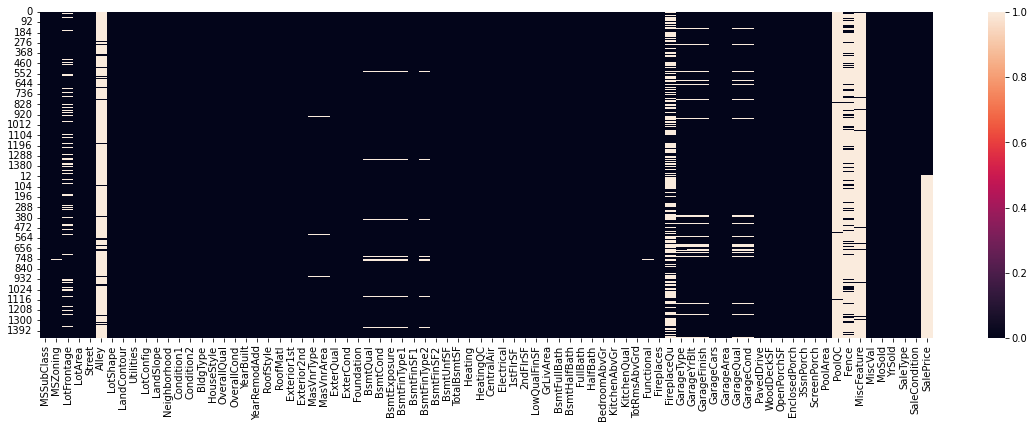

In [12]:
plt.figure(figsize = (20, 6))
sns.heatmap(df_train.isnull());

#### From the above Heatmap we can observe, there are few columns with lots of missing values. So, I want to Check which columns contain what percentage of Null values

In [13]:
features_containing_null_values = []

for features in df_train.columns:
    if df_train[features].isnull().sum() > 1:
        features_containing_null_values.append(features)
        
null_percentage = (df_train[features_containing_null_values].isnull().sum() / df_train.shape[0] * 100).sort_values(ascending = False)
null_percentage

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtFullBath     0.068517
Utilities        0.068517
BsmtHalfBath     0.068517
dtype: float64

#### Before understanding about the missing values, let us explore all the columns present in the Dataset

#### As we already know, out target feature is SalePrice. So first I will check the distribution of the Data.

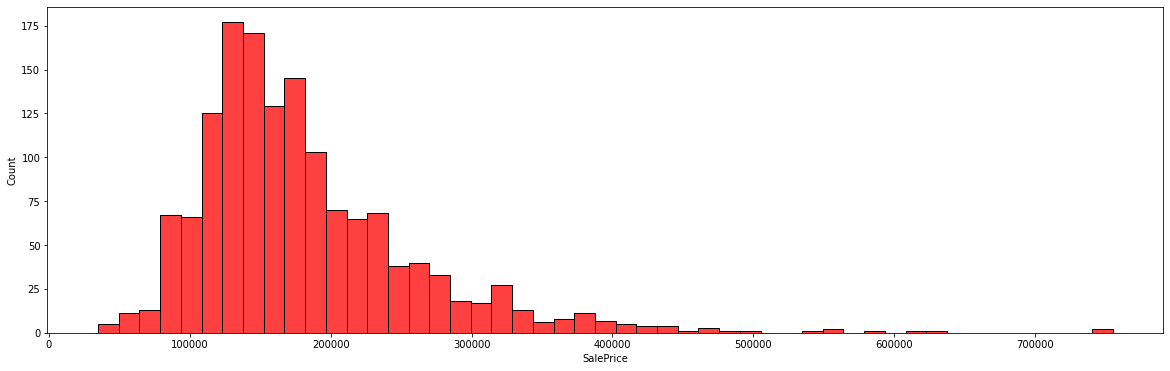

In [14]:
plt.figure(figsize = (20, 6))
sns.histplot(df_train['SalePrice'], color = 'r');

In [15]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### So, as per my observation, the SalePrice data is not normally distributed. Also it is Right skewed or in other word it has positive skewness.

#### To combat this, we can simply apply log over this feature. Just to see the results I am applying the log, after the whole process and before model training we will deciede, if we want to change the distribution of the feature or not.

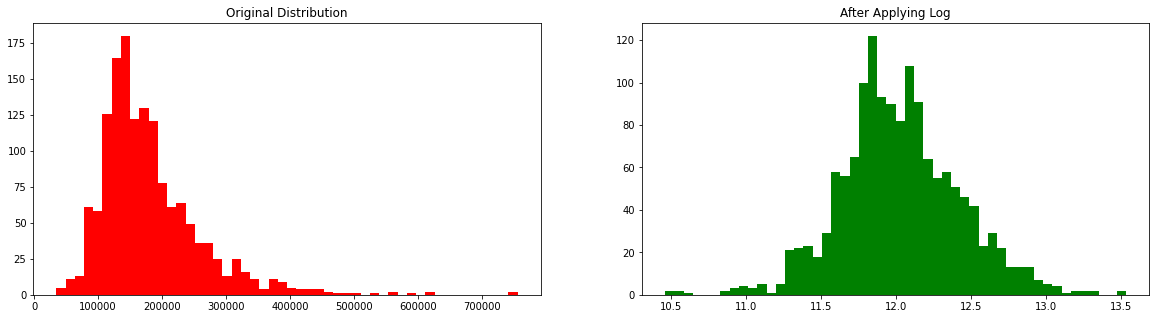

In [16]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
plt.hist(df_train['SalePrice'], color = 'r', bins = 50)
plt.gca().title.set_text("Original Distribution")

plt.subplot(1, 2, 2)
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])
plt.hist(df_train['SalePrice_Log'], color = 'g', bins = 50)
plt.gca().title.set_text("After Applying Log")

plt.show()

#### As we expected, by just applying log the whole feature is transformed to a Normal/Gaussian distribution. But, as I said, we will not finalize at this point we are just exploring the Dataset, if needed we will use it before Model training.

#### When we are calculation the No. of Numerical and No. of Categorical features, there are also some special features whcih are present in this Dataset. Those are called DateTime feature or sometimes we call it Temporal Variables. There are 4 such columns. We will separate them and try to learn the pattern drom the Dataset.

In [17]:
year_columns = []

for feature in numerical_features:
    if "Year" in feature or "Yr" in feature:
        year_columns.append(feature)
        
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Now lets plot these 4 special feature against our target feature to check if these features have any relationship with our target column.

### Data Visualization

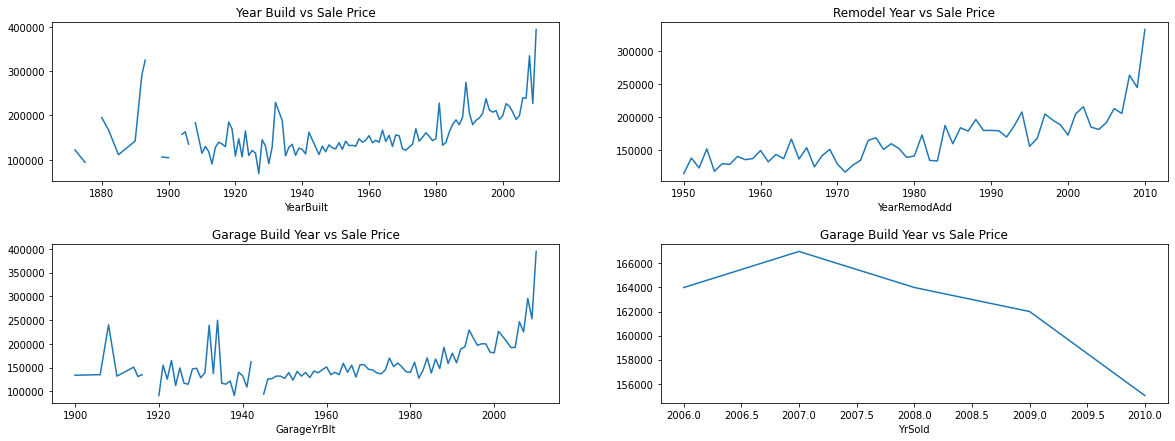

In [18]:
plt.figure(figsize = (20, 7))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(2, 2, 1)
df_train.groupby('YearBuilt')['SalePrice'].median().plot();
plt.gca().title.set_text("Year Build vs Sale Price")

plt.subplot(2, 2, 2)
df_train.groupby('YearRemodAdd')['SalePrice'].median().plot();
plt.gca().title.set_text("Remodel Year vs Sale Price")

plt.subplot(2, 2, 3)
df_train.groupby('GarageYrBlt')['SalePrice'].median().plot();
plt.gca().title.set_text("Garage Build Year vs Sale Price")

plt.subplot(2, 2, 4)
df_train.groupby('YrSold')['SalePrice'].median().plot();
plt.gca().title.set_text("Garage Build Year vs Sale Price")

plt.show()

#### As we can see the different plots are behaving differently from others. The YearBuilt, YearRemodAdd, and GarageYrBlt these 3 feature follows the upward trend but the YrSold feature is following a downward trend. Why is this happening, why the features are behaving differently, we will try to undertsand and handle each of the features separately. One quick observation, these columns do not have any days or months, these columns only contain years.

#### Also, we are plotting scatter plot for YearBuilt, YearRemodAdd, GarageYrBlt against the SalePrice column to be certain about the trends amongst these features.

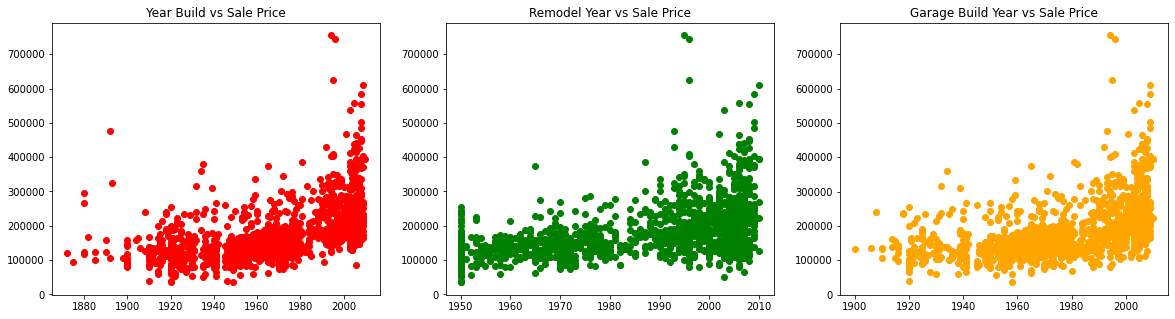

In [19]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_train["YearBuilt"], df_train["SalePrice"], color = 'r');
plt.gca().title.set_text("Year Build vs Sale Price")

plt.subplot(1, 3, 2)
plt.scatter(df_train["YearRemodAdd"], df_train["SalePrice"], color = 'g');
plt.gca().title.set_text("Remodel Year vs Sale Price")

plt.subplot(1, 3, 3)
plt.scatter(df_train["GarageYrBlt"], df_train["SalePrice"], color = 'orange');
plt.gca().title.set_text("Garage Build Year vs Sale Price")

plt.show()

#### As we can clearly see, these features are following the same trends. Now lets explorr Numerical features of the Dataset.

In [20]:
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


#### As we can obserse in Numberical features, we have both Discrete and Continuous features, we will explore them separetely. For now lets shift our focus to Discrete features.

In [21]:
discrete_feature = [feature for feature in numerical_features if len(df_train[feature].unique()) < 25 and feature not in year_columns + ['Id']]
len(discrete_feature)

14

#### So, as we can see there are 14 Discrete features present in our Dataset. Lets plot the using Bar Plot.

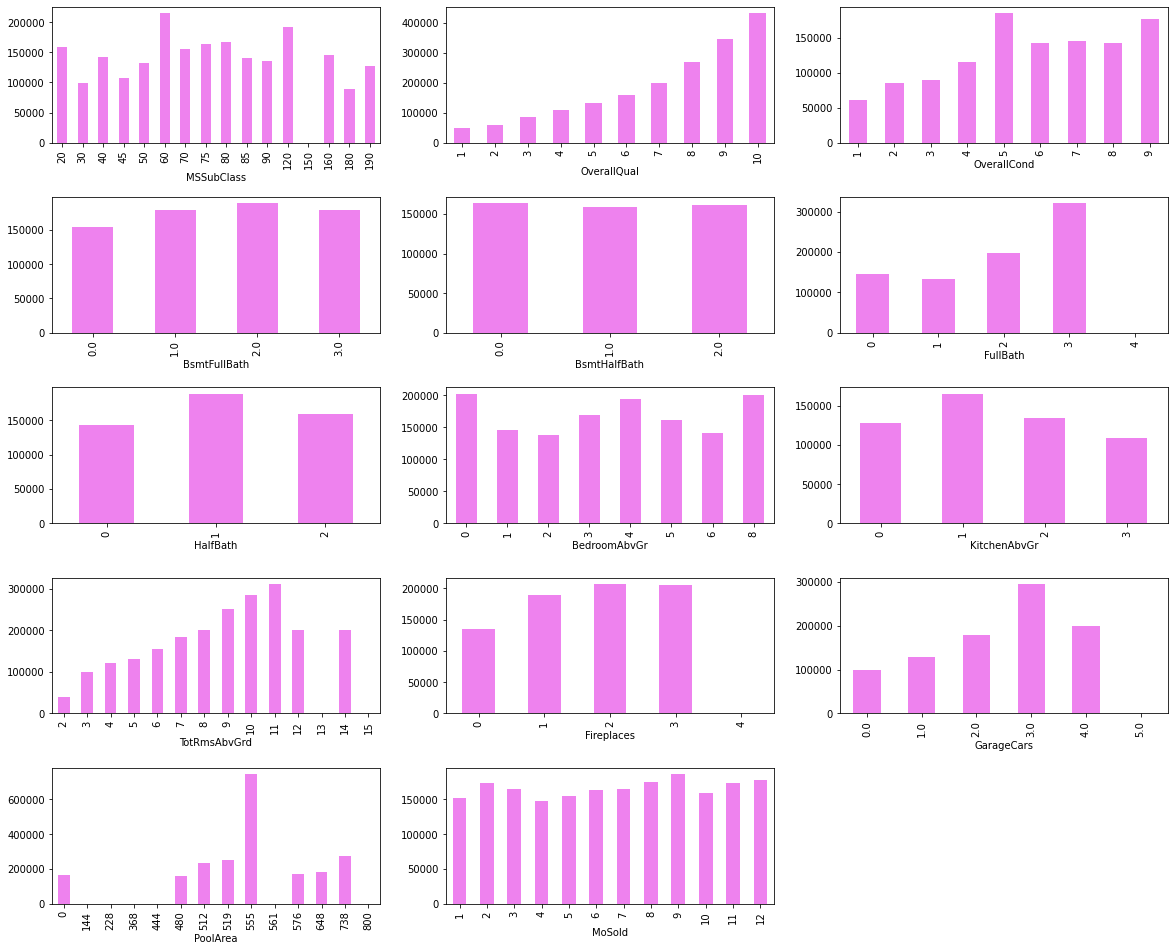

In [22]:
plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)
row = 6
col = 3
for i, feature in enumerate(list(discrete_feature), 1):
    plt.subplot(row, col, i)
    df_train.groupby(feature)['SalePrice'].median().plot.bar(color = "violet")

#### This above plots shows us all the Discrete features present in the Data. Just like previous different features behaving differently against our target variable.

#### Now, lets check the Continuous features, for that we take help from our old frined histograms to understnd more about each Continuous features. For before that we need to calculate how many Continuous features we have in our Dataset.

In [23]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_columns + ['Id']]
len(continuous_feature)

19

#### So, as we can see there are 19 Continuous features present in our Dataset. Lets check their distribution using Histogram.

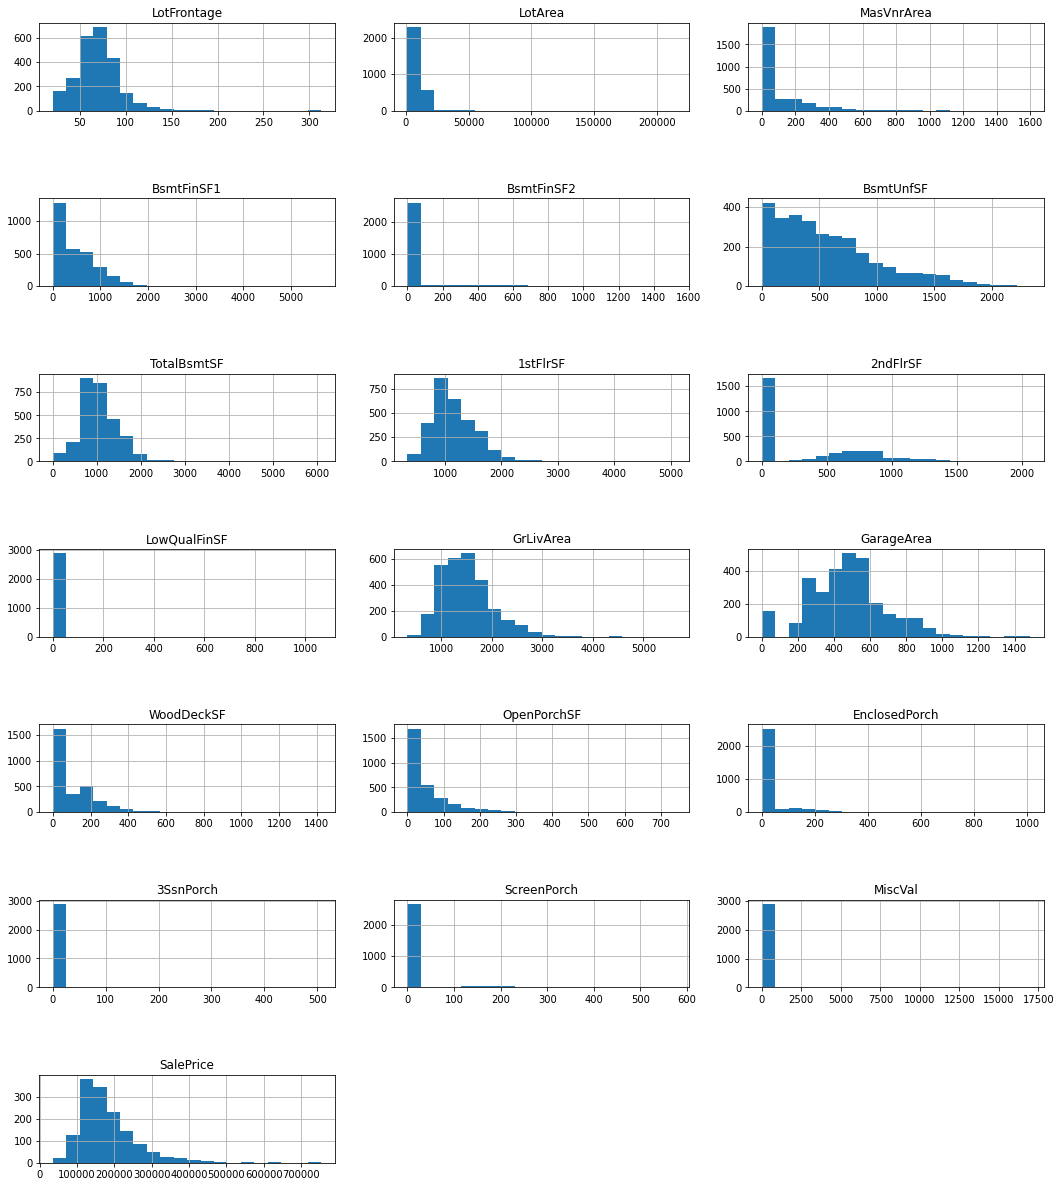

In [24]:
plt.figure(figsize = (18, 50))
plt.subplots_adjust(hspace = 1)
row = 16
col = 3
for i, feature in enumerate(list(continuous_feature), 1):
    plt.subplot(row, col, i)
    df_train[feature].hist(bins = 20)
    plt.title(feature)

#### After checking this distributions, we can observe there are few features which are heavily Right Skewed, some of them are other distribution, only the SalePrice is close to normal distribution comapred to them (But not Normal distribution) because of the confusion, lets also check the scatter plot against SalePrice for all the 16 Continuous features.

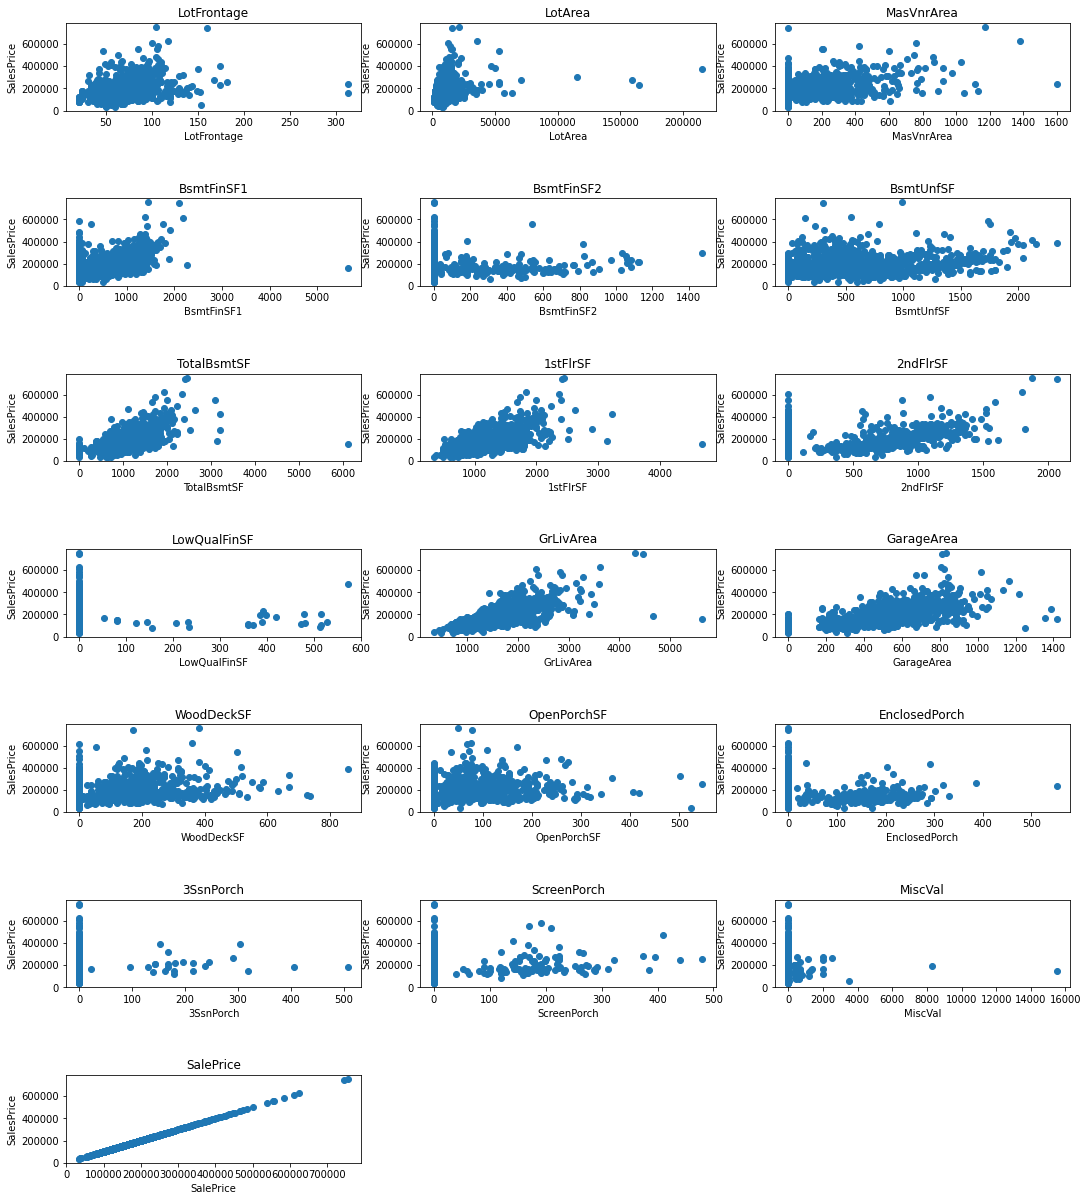

In [25]:
plt.figure(figsize = (18, 50))
plt.subplots_adjust(hspace = 1)
row = 16
col = 3
for i, feature in enumerate(list(continuous_feature), 1):
    plt.subplot(row, col, i)
    plt.scatter(df_train[feature], df_train['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)

#### Except the last continuous feature (Target Variable - SalePrice), all other Continuous features are having a non linear trend. Also we have some problem of Outliers also, to check this more clearly lets plot Boxplot.

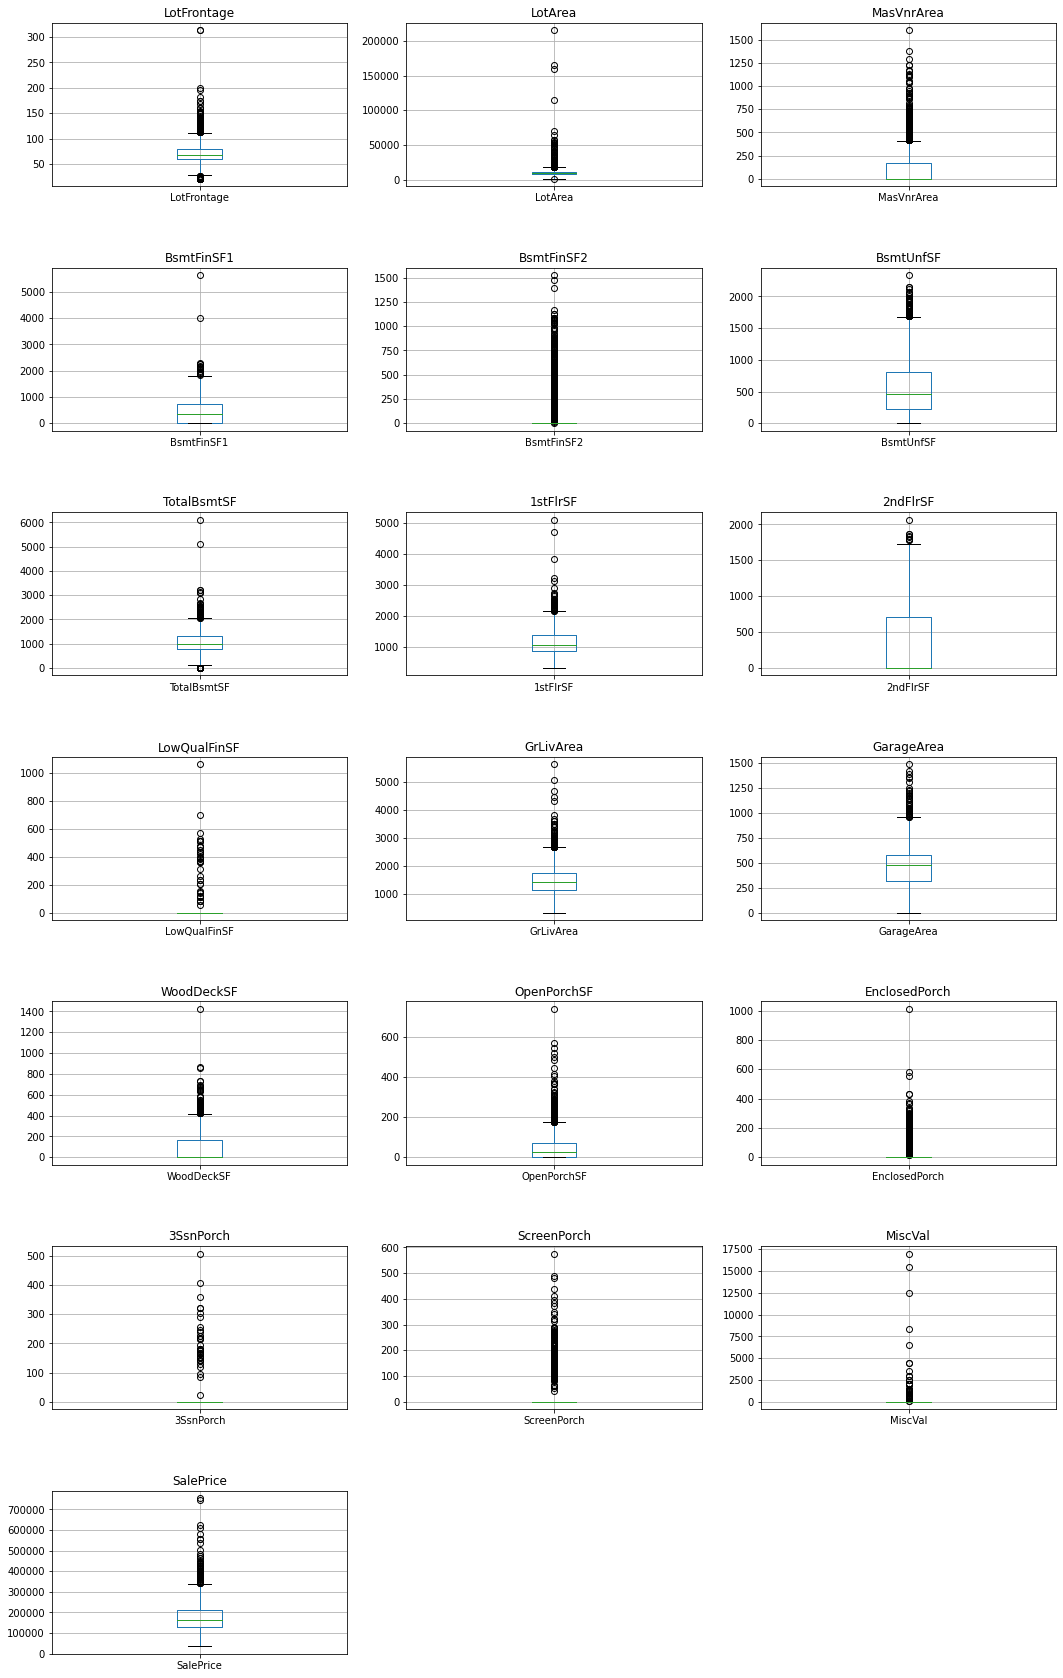

In [26]:
plt.figure(figsize = (18, 30))
plt.subplots_adjust(hspace = 0.5)
row = 7
col = 3
for i, feature in enumerate(list(continuous_feature), 1):
    plt.subplot(row, col, i)
    df_train.boxplot(column = feature)
    plt.title(feature)

#### As we can observe, becuase this is a real world dataset, it has many outliers for almost all the Continuous features.

#### After our basic exploration on the Numerical features, now we will shift to Categorical features. So, just like previously lets check how many category each feature have and what are those?

In [27]:
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']

for feature in categorical_features:
    print('{} contains {} categories'.format(feature,len(df_train[feature].unique())))

MSZoning contains 6 categories
Street contains 2 categories
Alley contains 3 categories
LotShape contains 4 categories
LandContour contains 4 categories
Utilities contains 3 categories
LotConfig contains 5 categories
LandSlope contains 3 categories
Neighborhood contains 25 categories
Condition1 contains 9 categories
Condition2 contains 8 categories
BldgType contains 5 categories
HouseStyle contains 8 categories
RoofStyle contains 6 categories
RoofMatl contains 8 categories
Exterior1st contains 16 categories
Exterior2nd contains 17 categories
MasVnrType contains 5 categories
ExterQual contains 4 categories
ExterCond contains 5 categories
Foundation contains 6 categories
BsmtQual contains 5 categories
BsmtCond contains 5 categories
BsmtExposure contains 5 categories
BsmtFinType1 contains 7 categories
BsmtFinType2 contains 7 categories
Heating contains 6 categories
HeatingQC contains 5 categories
CentralAir contains 2 categories
Electrical contains 6 categories
KitchenQual contains 5 cate

#### As we can see, there is no fixed categories in the Data, some feature have only 2 columns, on the otherhand some have 15 - 16 different categories, so it varies from feature to feature.

#### Now to get more clarity lets check the relationship between the Categorical features and the Target Variable (SalePrice).

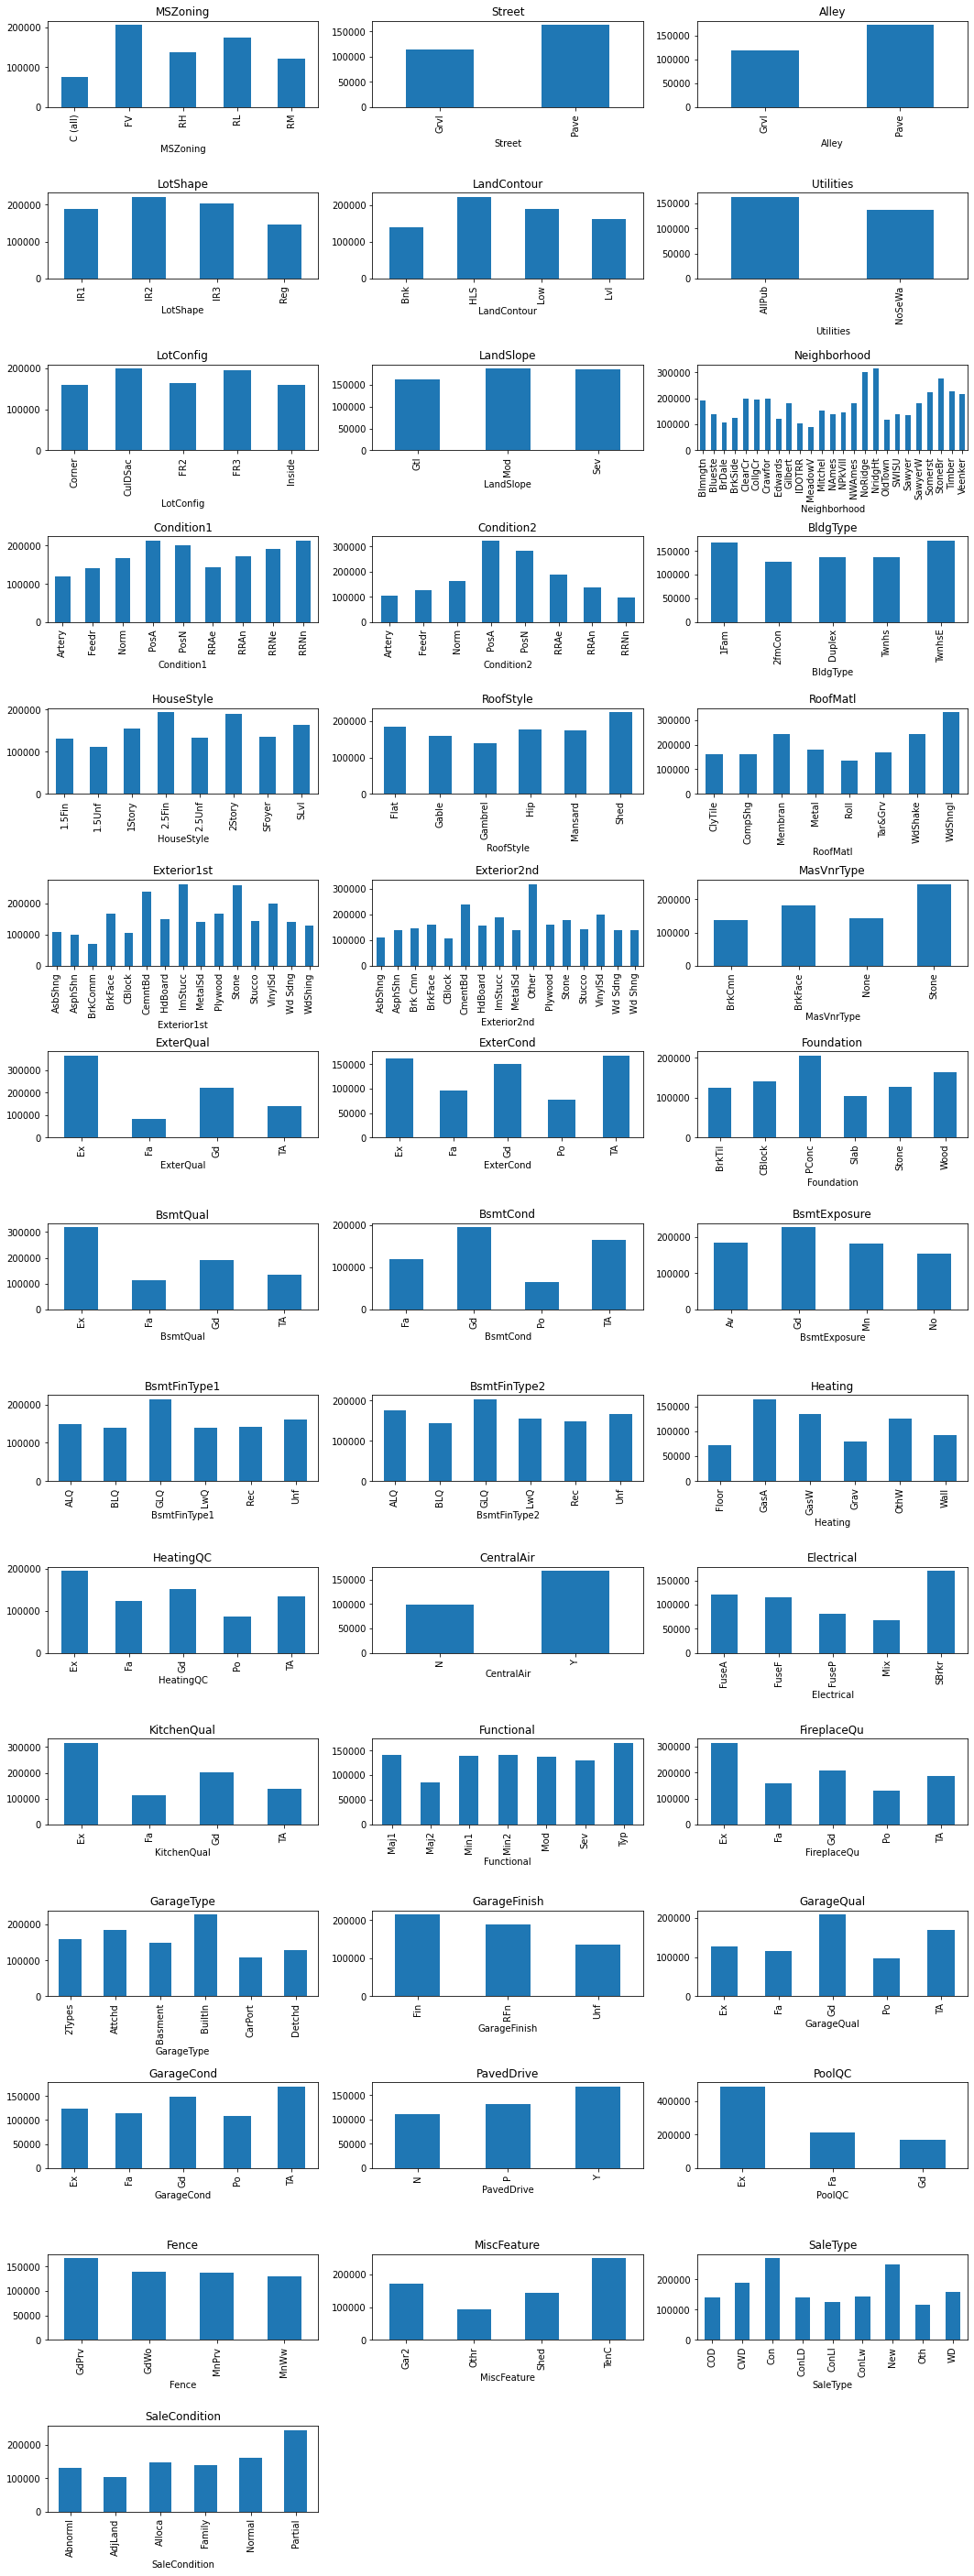

In [28]:
plt.figure(figsize = (18, 50))
plt.subplots_adjust(hspace = 1)
row = 15
col = 3
for i, feature in enumerate(list(categorical_features), 1):
    plt.subplot(row, col, i)
    df_train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)

#### So, as per my understanding there is no major irregularities in the Categorical features. But we cannot say that for sure, at the time of Feature Engineering, we will take each and every feature and Handle them, only then we can say with certainly. All I can say at this point is so far so good.

### Feature Engineering

#### Now comes the most tricky part of the whole task. To be honest there are lots of features, and we have check each one of them and understand the patterns. So, lets start.

#### We already plotted the null value heatmap, but just to jog our memory, we will plot it once more here.

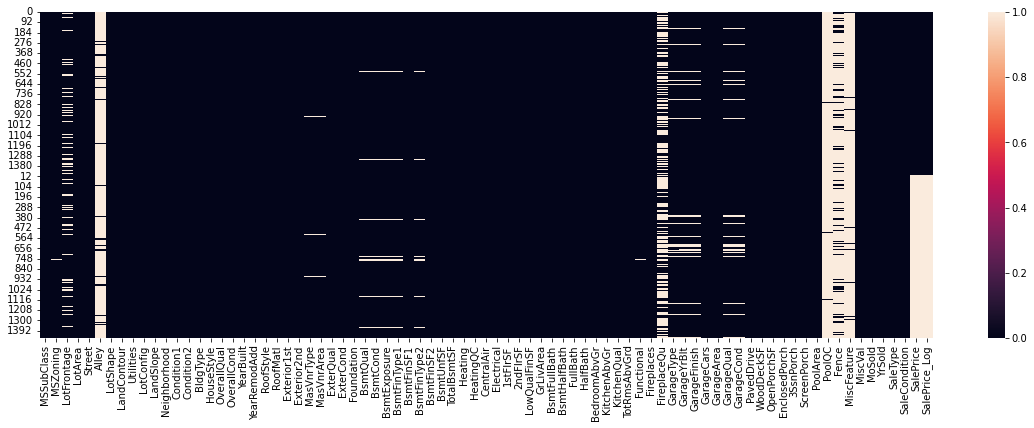

In [29]:
plt.figure(figsize = (20, 6))
sns.heatmap(df_train.isnull());

#### From the above Heatmap we can observe, there are few columns with lots of missing values. So, I want to check which columns contain what percentage of Null values.

In [30]:
features_containing_null_values = []

for features in df_train.columns:
    if df_train[features].isnull().sum() > 1:
        features_containing_null_values.append(features)
        
null_percentage = (df_train[features_containing_null_values].isnull().sum() / df_train.shape[0] * 100).sort_values(ascending = False)
null_percentage

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
SalePrice_Log    49.982871
SalePrice        49.982871
FireplaceQu      48.646797
LotFrontage      16.649538
GarageQual        5.447071
GarageFinish      5.447071
GarageYrBlt       5.447071
GarageCond        5.447071
GarageType        5.378554
BsmtExposure      2.809181
BsmtCond          2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
Functional        0.068517
BsmtFullBath      0.068517
Utilities         0.068517
BsmtHalfBath      0.068517
dtype: float64

#### Some of the columns contain more than 80% of the missing values. Those features are:

##### 1. PoolQC contains 99.52 % missing values
##### 2. MiscFeature contains 96.3 % missing values
##### 3. Alley contains 93.77 % missing values
##### 4. Fence contains 80.75 % missing values

#### There is one more feature which contain more than 47% missing values:
##### 5. FireplaceQu contains 47.26 % missing values

#### Note: All the 5 columns are Categorical columns.

#### Very Important Observation: After checking the values manually and reading the documentation/description, I found that these are not Null values. The values are some values which are present but pandas treating them as NAN. So, we will not delete the columns, instead e will replace them with constants. Lets take an sample to understand it better.

#### So, as per our previous analysis PoolQC(Pool quality) contains 99.52 % missing values. But when we read the documentation, we will found there are 5 different types of values.

    Ex: Excellent
    Gd: Good
    TA: Average/Typical
    Fa: Fair
    NA: No Pool

#### Here, NA means No Pool. It does not mean missing values. But pandas is treating it as NAN. This is not correct. So, we will just simply replace the 'NA: No Pool' value with 'No'.

#### Before making any kind of changes to out Data, let check other datatypes. Lets take Numerical features and Categorical features separately.

In [31]:
numerical_features_with_null = null_percentage[null_percentage.keys().isin(numerical_features)]
print("Total number of Numerical features with null values:", len(numerical_features_with_null))
numerical_features_with_null

Total number of Numerical features with null values: 6


SalePrice       49.982871
LotFrontage     16.649538
GarageYrBlt      5.447071
MasVnrArea       0.787941
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
dtype: float64

In [32]:
categorical_features_with_null = null_percentage[null_percentage.keys().isin(categorical_features)]
print("Total number of Categorical features with null values:", len(categorical_features_with_null))
categorical_features_with_null

Total number of Categorical features with null values: 18


PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
GarageQual       5.447071
GarageFinish     5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MSZoning         0.137033
Functional       0.068517
Utilities        0.068517
dtype: float64

#### As from above two codes, we can observe the Columns which contais missing values also what percentage missing values are present in those columns.

#### So as of now, we have 6 Numerical columns with null values and 18 Categorical columns with null values. But as discussed earlier we cannot say there are NAN values, So we will read the documentation and treat each column separately to get the best results.

#### Note: Just to be safe we will create multiple DataFrame of the Dataset, so even if the chenges happen to one of them others will stay correctly.

In [33]:
df_missing_value_imputation = df_train.copy()

### Missing Value Imputation

#### As we discussed earlier we will impute the missing values based on various caondition. Just to be clear before doing this step I have read the offical documentaion multiple times to gain more insight about the Data.

In [34]:
df_missing_value_imputation["LotFrontage"].replace(np.nan, df_train["LotFrontage"].mean(), inplace = True)

df_missing_value_imputation["GarageYrBlt"].replace(np.nan, 0, inplace = True)

df_missing_value_imputation["BsmtFullBath"].replace(np.nan, 0, inplace = True)

df_missing_value_imputation["BsmtHalfBath"].replace(np.nan, 0, inplace = True)

df_missing_value_imputation["PoolQC"].replace(np.nan, "No Pool", inplace = True)

df_missing_value_imputation["Alley"].replace(np.nan, "No alley access", inplace = True)

df_missing_value_imputation["MasVnrArea"].replace(np.nan, 0, inplace = True)

df_missing_value_imputation["MasVnrType"].replace(np.nan, df_train["MasVnrType"].mode()[0], inplace = True)

df_missing_value_imputation["Fence"].replace(np.nan, "No Fence", inplace = True)

df_missing_value_imputation["FireplaceQu"].replace(np.nan, "No Fireplace", inplace = True)

df_missing_value_imputation["GarageType"].replace(np.nan, "No Garage", inplace = True)

df_missing_value_imputation["GarageFinish"].replace(np.nan, "No Garage", inplace = True)

df_missing_value_imputation["GarageQual"].replace(np.nan, "No Garage", inplace = True)

df_missing_value_imputation["GarageCond"].replace(np.nan, "No Garage", inplace = True)

df_missing_value_imputation["BsmtExposure"].replace(np.nan, "No Basement", inplace = True)

df_missing_value_imputation["BsmtFinType1"].replace(np.nan, "No Basement", inplace = True)

df_missing_value_imputation["BsmtFinType2"].replace(np.nan, "No Basement", inplace = True)

df_missing_value_imputation["BsmtCond"].replace(np.nan, "No Basement", inplace = True)

df_missing_value_imputation["BsmtQual"].replace(np.nan, "No Basement", inplace = True)

df_missing_value_imputation["MiscFeature"].replace(np.nan, "None", inplace = True)

df_missing_value_imputation["MSZoning"].replace(np.nan, df_train["MSZoning"].mode()[0], inplace = True)

df_missing_value_imputation["Functional"].replace(np.nan, df_train["Functional"].mode()[0], inplace = True)

#### As we can see this took me sometime, to check each and every feature from the Dataset, read about it from the Documentation, perform exploratory operations on each and every columns (Due to time and space constraints I have not added the base operations like checking unique value, checking how many categories/values each columns have, the satistical distribution of the columns etc.) otherwise the notebook will going be very very long.

#### So, after imputaion, we should have handled all the missing values, to check that lets plot our favorite Heatmap with Null values.

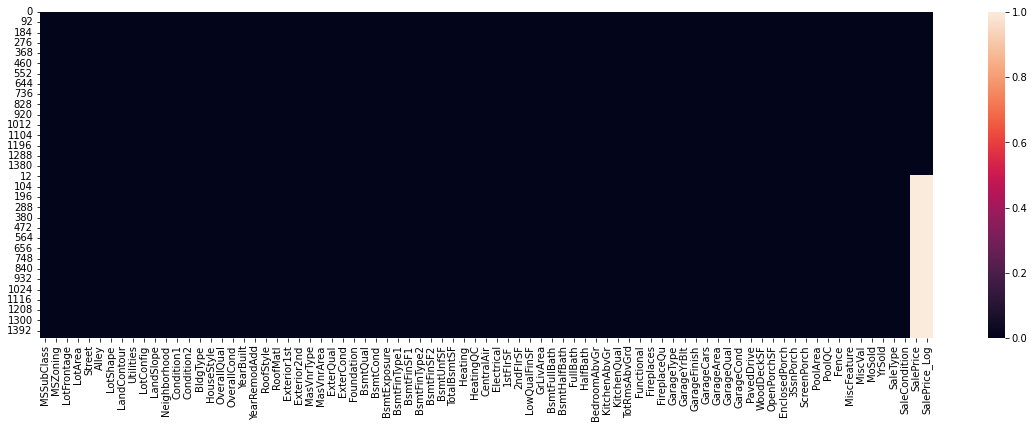

In [35]:
plt.figure(figsize = (20, 6))
sns.heatmap(df_missing_value_imputation.isnull());

#### As we all can clearly observe as of now there are not missing values in our Dataset (except in our target feature SalePrice, whcih we will predict, so that is okay), we have successfully (as of now) handled them.

#### Now we will chenge the few Numerical feature to Categories features.

### Numerical feature to Categorical feature

In [36]:
numerical_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]

In [37]:
df_missing_value_imputation[numerical_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,2003,2003,2003.0,2,2008
1,20,1976,1976,1976.0,5,2007
2,60,2001,2002,2001.0,9,2008
3,70,1915,1970,1998.0,2,2006
4,60,2000,2000,2000.0,12,2008


In [38]:
df_missing_value_imputation["MoSold"].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [39]:
df_missing_value_imputation["MoSold"] = df_missing_value_imputation["MoSold"].apply(lambda x: calendar.month_abbr[x])

df_missing_value_imputation[numerical_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,2003,2003,2003.0,Feb,2008
1,20,1976,1976,1976.0,May,2007
2,60,2001,2002,2001.0,Sep,2008
3,70,1915,1970,1998.0,Feb,2006
4,60,2000,2000,2000.0,Dec,2008


In [40]:
df_missing_value_imputation[numerical_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,2003,2003,2003.0,Feb,2008
1,20,1976,1976,1976.0,May,2007
2,60,2001,2002,2001.0,Sep,2008
3,70,1915,1970,1998.0,Feb,2006
4,60,2000,2000,2000.0,Dec,2008


In [41]:
numerical_conv2 = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]

In [42]:
for feat in numerical_conv2:
    df_missing_value_imputation[feat] = df_missing_value_imputation[feat].astype(str)

#### We can handled the conversions also now otherway round we will convert Categorical features to Numerical features. For this I will use Ordinal Encoding.

### Categorical features to Numerical features

### Ordinal Encoding

In [43]:
ordinal_encoding = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "Functional", "GarageFinish", "PavedDrive", "Utilities"]

In [44]:
len(ordinal_encoding)

17

In [45]:
df_missing_value_imputation["ExterQual"] = df_missing_value_imputation["ExterQual"].astype(CategoricalDtype(categories = ["Po", "Fa", "TA", "Gd", "Ex"], ordered = True)).cat.codes
df_missing_value_imputation['ExterCond'] = df_missing_value_imputation['ExterCond'].astype(CategoricalDtype(categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_missing_value_imputation['BsmtQual'] = df_missing_value_imputation['BsmtQual'].astype(CategoricalDtype(categories = ['No Basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_missing_value_imputation['BsmtCond'] = df_missing_value_imputation['BsmtCond'].astype(CategoricalDtype(categories = ['No Basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_missing_value_imputation["BsmtExposure"] = df_missing_value_imputation["BsmtExposure"].astype(CategoricalDtype(categories = ["No Basement", "No", "Mn", "Av", "Gd"], ordered = True)).cat.codes
df_missing_value_imputation['BsmtFinType1'] = df_missing_value_imputation['BsmtFinType1'].astype(CategoricalDtype(categories = ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_missing_value_imputation['BsmtFinType2'] = df_missing_value_imputation['BsmtFinType2'].astype(CategoricalDtype(categories = ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_missing_value_imputation['HeatingQC'] = df_missing_value_imputation['HeatingQC'].astype(CategoricalDtype(categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_missing_value_imputation['KitchenQual'] = df_missing_value_imputation['KitchenQual'].astype(CategoricalDtype(categories = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_missing_value_imputation['FireplaceQu'] = df_missing_value_imputation['FireplaceQu'].astype(CategoricalDtype(categories = ["No Fireplace", "Po", "Fa", "TA", "Gd", "Ex"], ordered = True)).cat.codes
df_missing_value_imputation['GarageQual'] = df_missing_value_imputation['GarageQual'].astype(CategoricalDtype(categories = ['No Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_missing_value_imputation['GarageCond'] = df_missing_value_imputation['GarageCond'].astype(CategoricalDtype(categories = ['No Garage', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_missing_value_imputation['PoolQC'] = df_missing_value_imputation['PoolQC'].astype(CategoricalDtype(categories = ["No Pool", "Fa", "TA", "Gd", "Ex"], ordered = True)).cat.codes
df_missing_value_imputation['Functional'] = df_missing_value_imputation['Functional'].astype(CategoricalDtype(categories = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_missing_value_imputation['GarageFinish'] = df_missing_value_imputation['GarageFinish'].astype(CategoricalDtype(categories = ['No Garage', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_missing_value_imputation['PavedDrive'] = df_missing_value_imputation['PavedDrive'].astype(CategoricalDtype(categories = ['N', 'P', 'Y'], ordered = True)).cat.codes
df_missing_value_imputation['Utilities'] = df_missing_value_imputation['Utilities'].astype(CategoricalDtype(categories = ['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [46]:
df_missing_value_imputation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [47]:
df_missing_value_imputation.shape

(2919, 81)

#### As we can see we have still 32 Categorical features, next we will handle them, our ML model will not understand any categories, it only understand Numbers, so we will convert these values to Numberical Values via One-Hot Encoding to handle the Nominal Categorical Data.

### One-Hot Encoding for Nominal Categorical Data

In [48]:
df_encode = df_missing_value_imputation.copy()

In [49]:
object_features = df_encode.select_dtypes(include = "object").columns.tolist()

In [50]:
print(len(object_features))
print(object_features)

32
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [51]:
df_encode.shape

(2919, 81)

In [52]:
df_encode[object_features].head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,No Fence,None,Feb,2008,WD,Normal
1,20,RL,Pave,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,No Fence,None,May,2007,WD,Normal
2,60,RL,Pave,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2001.0,No Fence,None,Sep,2008,WD,Normal


In [53]:
df_encode = pd.get_dummies(df_encode, columns = object_features, prefix = object_features, drop_first = True)

In [54]:
df_encode.shape

(2919, 514)

In [55]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 514 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(12), int64(20), int8(17), uint8(465)
memory usage: 2.1 MB


#### Now, we can clearly see we have only Numerical values in our Dataset, so now we are finally ready for the Machine Learning part.

#### Now we have a little bit of problem. We can go two different ways, one as in Kaggle compitition people oftern do, they concate the train and test dataset to get more training points. But from my very very limited knowledge that, the insdustry or in the real world in a company, people do not do ML this way. They first took the train dataset and do a train_test_split on top of it to avoid Data Leakage issues. I have tried both the ways, but the combining all the values will give us more wholesome results. I am using that approach as for now, but will change or add both of them if I get some time.

### Train-Test Split

In [56]:
len_train = df_train_main.shape[0]
len_train

1460

In [57]:
X_train = df_encode[:len_train].drop("SalePrice", axis = 1)

In [58]:
y_train = df_encode["SalePrice"][:len_train]

In [59]:
X_test = df_encode[len_train:].drop("SalePrice", axis = 1)

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1460, 513)
(1460,)
(1459, 513)


#### As we can see, now we have our data prepared for the Machine Learing Models. Now we will do a very important step called - Feature Scaling to get the most out of the Data.

### Feature Scaling

In [61]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_train

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [-0.17794032, -0.14781027,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685, -0.08016039,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.23081032, -0.05811155,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [63]:
X_test

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 4.09123304,  0.95042275,  0.02618016, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [-0.35960727, -0.00759964,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358, -0.08918038,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

### Model Training

#### As we know now our Data is prepared, so we will use multiple models with r2 score as a Regression metrics, after the training if the results are not that good, we cal always restructure the whole process.

In [64]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

In [65]:
models = {"a": ["LinearRegression", lr],
          "b": ["Ridge", ridge],
          "c": ["Lasso", lasso],
          "d": ["ElasticNet", elastic_net],
          "e": ["SGDRegressor", sgdr],
          "f": ["KNeighborsRegressor", knr],
          "g": ["GaussianProcessRegressor", gpr],
          "h": ["DecisionTreeRegressor", dtr],
          "i": ["GradientBoostingRegressor", gbr],
          "j": ["RandomForestRegressor", rfr],
          "k": ["XGBRegressor", xgbr]}

models

{'a': ['LinearRegression', LinearRegression()],
 'b': ['Ridge', Ridge()],
 'c': ['Lasso', Lasso()],
 'd': ['ElasticNet', ElasticNet()],
 'e': ['SGDRegressor', SGDRegressor()],
 'f': ['KNeighborsRegressor', KNeighborsRegressor()],
 'g': ['GaussianProcessRegressor', GaussianProcessRegressor()],
 'h': ['DecisionTreeRegressor', DecisionTreeRegressor()],
 'i': ['GradientBoostingRegressor', GradientBoostingRegressor()],
 'j': ['RandomForestRegressor', RandomForestRegressor()],
 'k': ['XGBRegressor', XGBRegressor()]}

In [66]:
def test_model(model, X_train = X_train, y_train = y_train):
    cv = KFold(n_splits = 7, shuffle = True, random_state = 42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv = cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [67]:
import warnings
warnings.filterwarnings('ignore')

models_score = []
models_name = []
model_performance = []

for model in models:
    models_name.append(models[model][0])
    print("Training Model:", models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    model_performance.append(score[0])
    print("Performance of the Model", score)
    models_score.append([models[model][0], score[0]])

Training Model: LinearRegression
Performance of the Model [-4.376858340312579e+24]
Training Model: Ridge
Performance of the Model [0.8780214384115886]
Training Model: Lasso
Performance of the Model [0.8737418960291918]
Training Model: ElasticNet
Performance of the Model [0.845805955895956]
Training Model: SGDRegressor
Performance of the Model [-3553.1906140888955]
Training Model: KNeighborsRegressor
Performance of the Model [0.5854081729934156]
Training Model: GaussianProcessRegressor
Performance of the Model [-5.333303682811296]
Training Model: DecisionTreeRegressor
Performance of the Model [0.9860642818022158]
Training Model: GradientBoostingRegressor
Performance of the Model [0.997070841559618]
Training Model: RandomForestRegressor
Performance of the Model [0.9952675970331407]
Training Model: XGBRegressor
Performance of the Model [0.9968555419311075]


In [68]:
models_score

[['LinearRegression', -4.376858340312579e+24],
 ['Ridge', 0.8780214384115886],
 ['Lasso', 0.8737418960291918],
 ['ElasticNet', 0.845805955895956],
 ['SGDRegressor', -3553.1906140888955],
 ['KNeighborsRegressor', 0.5854081729934156],
 ['GaussianProcessRegressor', -5.333303682811296],
 ['DecisionTreeRegressor', 0.9860642818022158],
 ['GradientBoostingRegressor', 0.997070841559618],
 ['RandomForestRegressor', 0.9952675970331407],
 ['XGBRegressor', 0.9968555419311075]]

### Few pointer before finish the task: First of all the scores an be heavly improved. There are a lot of feature transformtion, feature construction, feature splitting, feature selection that we can do in the Dataset, due to time constraints, we are not able to do that, also we have not done any kind of hyperparameter tunning. I believe if we use that our score will be impcted very much. There are some data leakage issue due to train and test concate, I will also try the convesional method of train_test_split from only the training dataset for this project. Also there are some ambigious columns and after reading the description/documentaion we did not get the full picture. There are correlation that we can test and delete/modify based on our model needs. Finally, I loved working this projects as part of the task, I will submit it today, but I will keep on imporing and will create a full notebook with all the explaination from the project. Thank you so much, have a nice day.